In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
med_df = pd.read_csv("noshowappointments-kagglev2-may-2016.csv")
print(med_df.head())

      PatientId  AppointmentID Gender          ScheduledDay  \
0  2.987250e+13        5642903      F  2016-04-29T18:38:08Z   
1  5.589978e+14        5642503      M  2016-04-29T16:08:27Z   
2  4.262962e+12        5642549      F  2016-04-29T16:19:04Z   
3  8.679512e+11        5642828      F  2016-04-29T17:29:31Z   
4  8.841186e+12        5642494      F  2016-04-29T16:07:23Z   

         AppointmentDay  Age      Neighbourhood  Scholarship  Hipertension  \
0  2016-04-29T00:00:00Z   62    JARDIM DA PENHA            0             1   
1  2016-04-29T00:00:00Z   56    JARDIM DA PENHA            0             0   
2  2016-04-29T00:00:00Z   62      MATA DA PRAIA            0             0   
3  2016-04-29T00:00:00Z    8  PONTAL DE CAMBURI            0             0   
4  2016-04-29T00:00:00Z   56    JARDIM DA PENHA            0             1   

   Diabetes  Alcoholism  Handcap  SMS_received No-show  
0         0           0        0             0      No  
1         0           0        0      

In [4]:
print(med_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB
None


In [5]:
print(med_df.duplicated().sum())

0


In [6]:
print(med_df.nunique())

PatientId          62299
AppointmentID     110527
Gender                 2
ScheduledDay      103549
AppointmentDay        27
Age                  104
Neighbourhood         81
Scholarship            2
Hipertension           2
Diabetes               2
Alcoholism             2
Handcap                5
SMS_received           2
No-show                2
dtype: int64


In [8]:
# exploring handcap values
med_df['Handcap'].value_counts()

Handcap
0    108286
1      2042
2       183
3        13
4         3
Name: count, dtype: int64

In [9]:
# exploring age column distribution
med_df['Age'].describe()

count    110527.000000
mean         37.088874
std          23.110205
min          -1.000000
25%          18.000000
50%          37.000000
75%          55.000000
max         115.000000
Name: Age, dtype: float64

In [11]:
# dropping columns and validating changes
med_df.drop(['PatientId', 'AppointmentID'], axis = 1, inplace = True)
print(med_df.columns)

Index(['Gender', 'ScheduledDay', 'AppointmentDay', 'Age', 'Neighbourhood',
       'Scholarship', 'Hipertension', 'Diabetes', 'Alcoholism', 'Handcap',
       'SMS_received', 'No-show'],
      dtype='object')


In [14]:
med_df.AppointmentDay.unique

<bound method Series.unique of 0         2016-04-29T00:00:00Z
1         2016-04-29T00:00:00Z
2         2016-04-29T00:00:00Z
3         2016-04-29T00:00:00Z
4         2016-04-29T00:00:00Z
                  ...         
110522    2016-06-07T00:00:00Z
110523    2016-06-07T00:00:00Z
110524    2016-06-07T00:00:00Z
110525    2016-06-07T00:00:00Z
110526    2016-06-07T00:00:00Z
Name: AppointmentDay, Length: 110527, dtype: object>

In [19]:
# changing data type
med_df['ScheduledDay'] = pd.to_datetime(med_df['ScheduledDay'])
med_df['AppointmentDay'] = pd.to_datetime(med_df['AppointmentDay'])

# confirming changes
print(med_df[['AppointmentDay', 'ScheduledDay']].dtypes)
print(med_df.head())

AppointmentDay    datetime64[ns]
ScheduledDay      datetime64[ns]
dtype: object
  Gender ScheduledDay AppointmentDay  Age      Neighbourhood  Scholarship  \
0      F   2016-04-29     2016-04-29   62    JARDIM DA PENHA            0   
1      M   2016-04-29     2016-04-29   56    JARDIM DA PENHA            0   
2      F   2016-04-29     2016-04-29   62      MATA DA PRAIA            0   
3      F   2016-04-29     2016-04-29    8  PONTAL DE CAMBURI            0   
4      F   2016-04-29     2016-04-29   56    JARDIM DA PENHA            0   

   Hipertension  Diabetes  Alcoholism  Handcap  SMS_received No-show  
0             1         0           0        0             0      No  
1             0         0           0        0             0      No  
2             0         0           0        0             0      No  
3             0         0           0        0             0      No  
4             1         1           0        0             0      No  


In [20]:
# making new due days column
med_df['due-days'] = med_df['AppointmentDay'] - med_df['ScheduledDay']

# converting data type 
med_df['due-days'] = med_df['due-days'].dt.days

# drop sch and appoint col
med_df.drop(['AppointmentDay', 'ScheduledDay'], axis = 1, inplace = True)

In [22]:
# viewing summery statistics
med_df['due-days'].describe()

count    110527.000000
mean         10.183702
std          15.254996
min          -6.000000
25%           0.000000
50%           4.000000
75%          15.000000
max         179.000000
Name: due-days, dtype: float64

In [23]:
# viewing negative days values
med_df[med_df['due-days'] < 0 ]

,Gender,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show,due-days
27033,M,38,RESISTÊNCIA,0,0,0,0,1,0,Yes,-1
55226,F,19,SANTO ANTÔNIO,0,0,0,0,1,0,Yes,-1
64175,F,22,CONSOLAÇÃO,0,0,0,0,0,0,Yes,-1
71533,F,81,SANTO ANTÔNIO,0,0,0,0,0,0,Yes,-6
72362,M,7,TABUAZEIRO,0,0,0,0,0,0,Yes,-1


In [24]:
# dropping these values and confirming changes
med_df.drop(med_df[med_df['due-days'] < 0].index, inplace = True)
med_df['due-days'].describe()

count    110522.000000
mean         10.184253
std          15.255115
min           0.000000
25%           0.000000
50%           4.000000
75%          15.000000
max         179.000000
Name: due-days, dtype: float64

In [25]:
# converting column and confirming changes
med_df['Gender'] = med_df['Gender'].astype('category')

med_df['Gender'].dtypes

CategoricalDtype(categories=['F', 'M'], ordered=False, categories_dtype=object)

In [27]:
# converting columns to bool and confirming changes
cols = ['Scholarship', 'Hipertension', 'Diabetes', 'Alcoholism', 'SMS_received']
med_df[cols] = med_df[cols].astype('bool')
med_df[cols].dtypes

Scholarship     bool
Hipertension    bool
Diabetes        bool
Alcoholism      bool
SMS_received    bool
dtype: object

In [29]:
# mapping alues to be more familiar
med_df.loc[med_df['No-show'] == 'Yes', 'No-show'] = 0
med_df.loc[med_df['No-show'] == 'No', 'No-show'] = 1

# casting dt type and confirming changes
med_df['No-show'] = med_df['No-show'].astype(bool)
med_df['No-show'].dtypes

dtype('bool')

In [31]:
# viewing rows with values of handcap > 1
med_df[med_df['Handcap'] > 1]

,Gender,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show,due-days
946,M,94,BELA VISTA,False,True,True,False,2,True,True,15
1665,M,64,SANTA MARTHA,False,True,False,True,2,True,True,30
1666,M,64,SANTA MARTHA,False,True,False,True,2,False,True,30
2071,M,64,SANTA MARTHA,False,True,False,True,2,False,True,0
2091,F,11,ANDORINHAS,False,False,False,False,2,False,True,0
...,...,...,...,...,...,...,...,...,...,...,...
108376,F,44,ROMÃO,False,True,True,False,2,True,True,6
109484,M,64,DA PENHA,False,True,True,False,2,False,True,2
109733,F,34,JUCUTUQUARA,False,False,False,False,2,True,True,4
109975,M,39,PRAIA DO SUÁ,True,False,False,False,2,True,True,4


In [32]:
# filling the bigger values with 1
med_df.loc[med_df['Handcap'].isin([2, 3, 4]), 'Handcap'] = 1

# casting type and confirming changes
med_df['Handcap'] = med_df['Handcap'].astype('bool')
med_df['Handcap'].unique()

array([False,  True])

In [34]:
#exploring values below 0
med_df[med_df['Age'] < 0]

,Gender,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show,due-days
99832,F,-1,ROMÃO,False,False,False,False,False,False,True,0


In [35]:
# dropping row with negative age and confirming changes
med_df.drop(med_df[med_df['Age'] < 0].index, inplace = True)
med_df[med_df['Age'] < 0]

,Gender,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show,due-days


In [36]:
print(med_df.head())

  Gender  Age      Neighbourhood  Scholarship  Hipertension  Diabetes  \
0      F   62    JARDIM DA PENHA        False          True     False   
1      M   56    JARDIM DA PENHA        False         False     False   
2      F   62      MATA DA PRAIA        False         False     False   
3      F    8  PONTAL DE CAMBURI        False         False     False   
4      F   56    JARDIM DA PENHA        False          True      True   

   Alcoholism  Handcap  SMS_received  No-show  due-days  
0       False    False         False     True         0  
1       False    False         False     True         0  
2       False    False         False     True         0  
3       False    False         False     True         0  
4       False    False         False     True         0  


In [37]:
print(med_df.info())

<class 'pandas.core.frame.DataFrame'>
Index: 110521 entries, 0 to 110526
Data columns (total 11 columns):
 #   Column         Non-Null Count   Dtype   
---  ------         --------------   -----   
 0   Gender         110521 non-null  category
 1   Age            110521 non-null  int64   
 2   Neighbourhood  110521 non-null  object  
 3   Scholarship    110521 non-null  bool    
 4   Hipertension   110521 non-null  bool    
 5   Diabetes       110521 non-null  bool    
 6   Alcoholism     110521 non-null  bool    
 7   Handcap        110521 non-null  bool    
 8   SMS_received   110521 non-null  bool    
 9   No-show        110521 non-null  bool    
 10  due-days       110521 non-null  int64   
dtypes: bool(7), category(1), int64(2), object(1)
memory usage: 4.2+ MB
None


In [38]:
# setting seaborn configurations
sns.set_style("whitegrid") 

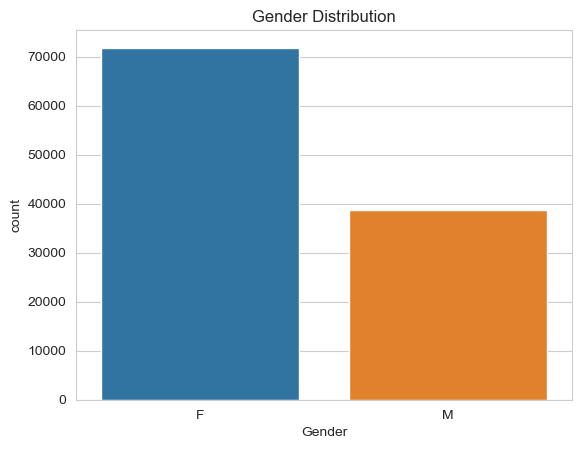

In [40]:
# viewing count plot of gender distribution in our dataset
sns.countplot(x = 'Gender', data = med_df, hue='Gender')
plt.title("Gender Distribution")
plt.show()

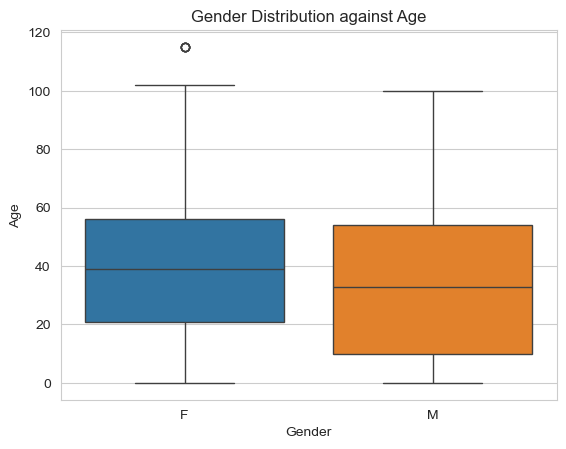

In [41]:
# viewing count plot of gender distribution against age in our dataset
sns.boxplot(x = 'Gender', y = 'Age', data = med_df, hue='Gender')
plt.title("Gender Distribution against Age")
plt.show()

In [42]:
med_df['No-show'].value_counts()

No-show
True     88207
False    22314
Name: count, dtype: int64

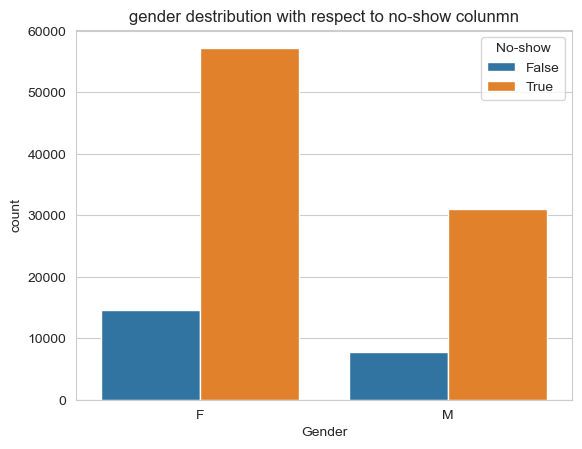

In [43]:
# showing the gender destribution with respect to the no-show colunmn
sns.countplot(x = 'Gender', data = med_df, hue = 'No-show')
plt.title('gender destribution with respect to no-show colunmn')
plt.show()

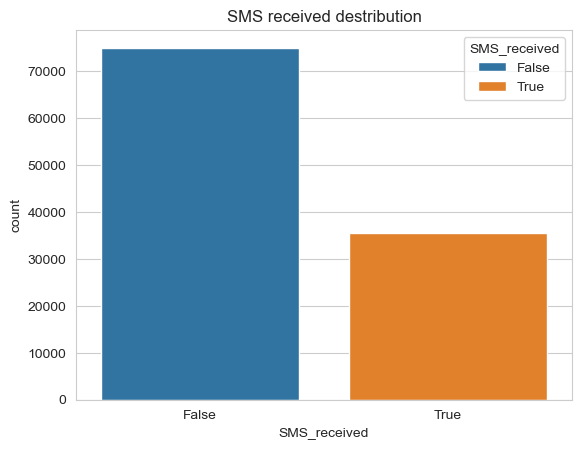

In [46]:
# viewing count plot of recieving SMS distribution in our dataset
sns.countplot(x = 'SMS_received', data = med_df, hue='SMS_received')
plt.title("SMS received destribution")
plt.show()

In [47]:
med_df['SMS_received'].value_counts()

SMS_received
False    75039
True     35482
Name: count, dtype: int64

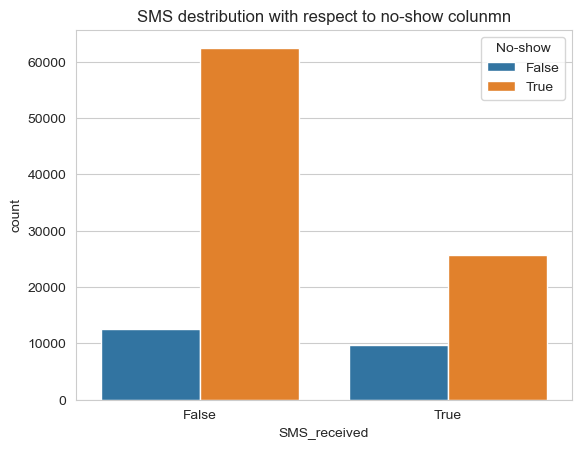

In [48]:
# showing the sms destribution with respect to the no-show colunmn
sns.countplot(x = 'SMS_received', data = med_df, hue = 'No-show')
plt.title('SMS destribution with respect to no-show colunmn')
plt.show()

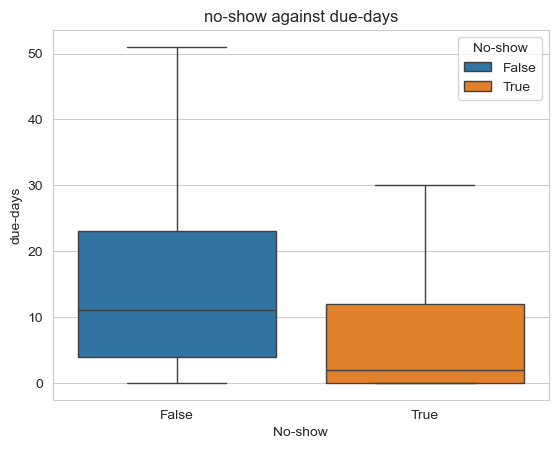

In [51]:
# viewing the correlation between no-show and due-days without outliers
sns.boxplot(x = 'No-show', y = 'due-days', data = med_df, showfliers = False, hue='No-show')
plt.title('no-show against due-days')
plt.show()

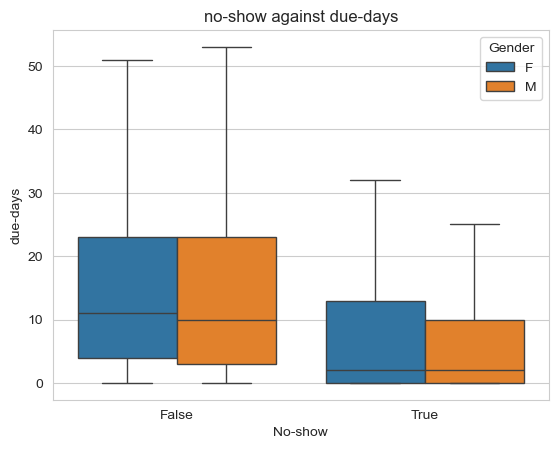

In [53]:
# viewing the correlation between no-show and due-days without outliers with respect to gender
sns.boxplot(x = 'No-show', y = 'due-days', data = med_df, hue = 'Gender', showfliers = False)
plt.title('no-show against due-days')
plt.show()

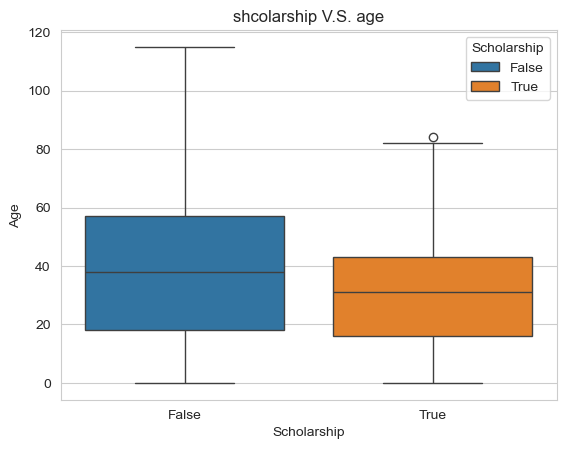

In [54]:
# plotting having a scholarship against age
sns.boxplot(x = 'Scholarship', y = 'Age', data = med_df, hue='Scholarship')
plt.title('shcolarship V.S. age')
plt.show()

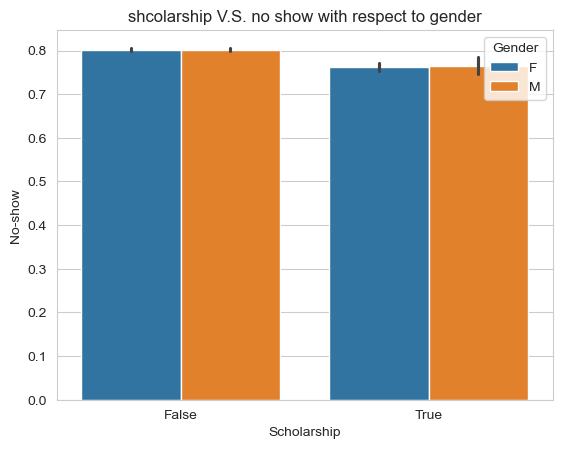

In [55]:
# plotting having a scholarship against no show with respect to gender
sns.barplot(x = 'Scholarship', y = 'No-show', hue = 'Gender', data = med_df)
plt.title('shcolarship V.S. no show with respect to gender')
plt.show()

<Axes: >

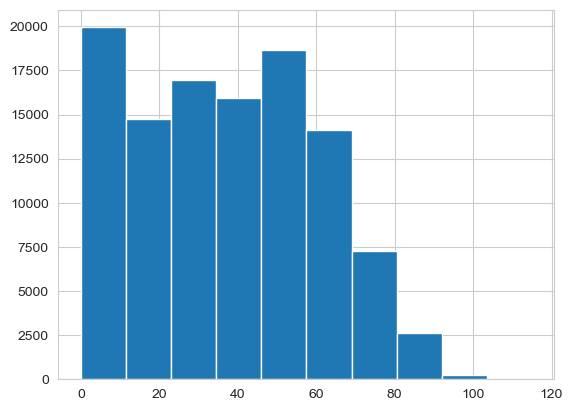

In [56]:
# ploting age destribution
med_df['Age'].hist()

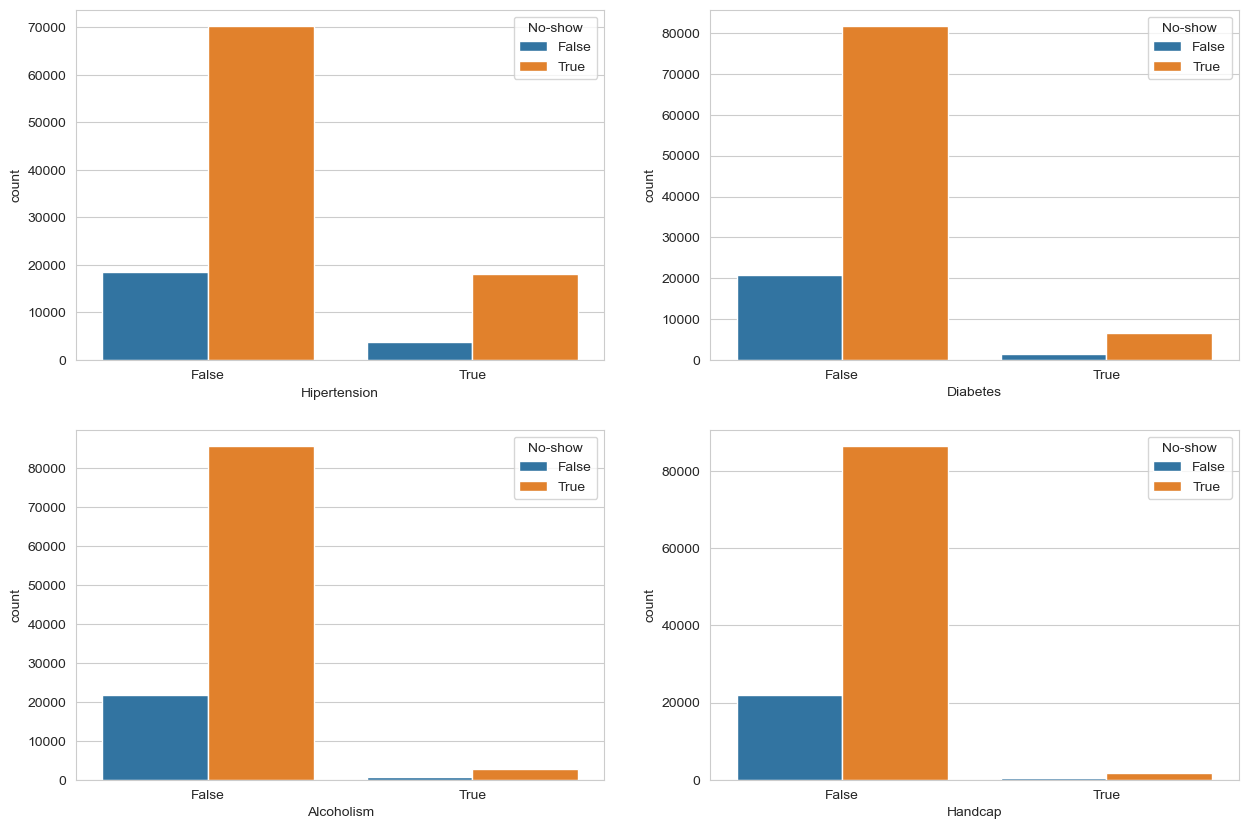

In [57]:
# plotting deseases against no show
plt.figure(figsize=(15,10))
plt.subplot(2,2,1)
sns.countplot(x = 'Hipertension', data = med_df, hue= 'No-show')
plt.subplot(2,2,2)
sns.countplot(x = 'Diabetes', data = med_df, hue= 'No-show')
plt.subplot(2,2,3)
sns.countplot(x = 'Alcoholism', data = med_df, hue= 'No-show')
plt.subplot(2,2,4)
sns.countplot(x = 'Handcap', data = med_df, hue= 'No-show')
plt.show()

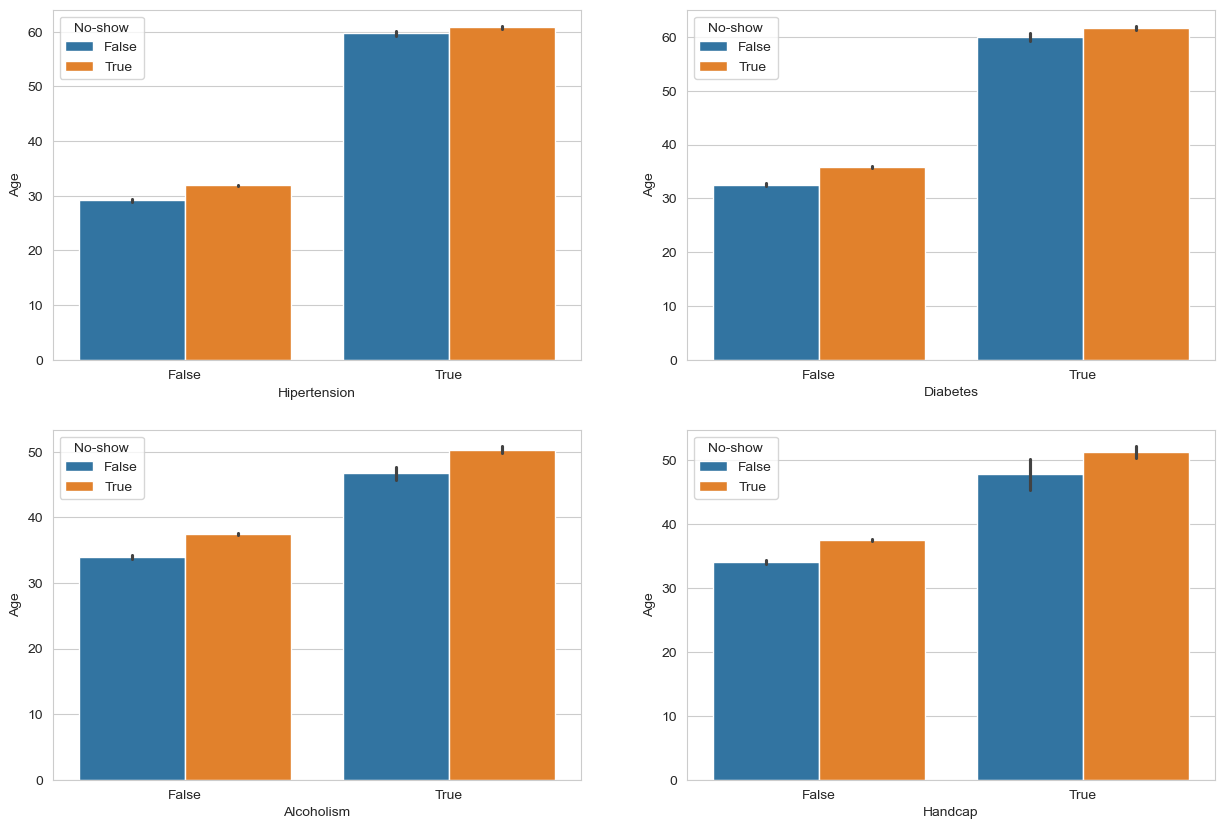

In [58]:
# plotting deseases against no show with respect to age
plt.figure(figsize=(15,10))
plt.subplot(2,2,1)
sns.barplot(x = 'Hipertension', y = 'Age', data = med_df, hue= 'No-show')
plt.subplot(2,2,2)
sns.barplot(x = 'Diabetes', y = 'Age', data = med_df, hue= 'No-show')
plt.subplot(2,2,3)
sns.barplot(x = 'Alcoholism', y = 'Age', data = med_df, hue= 'No-show')
plt.subplot(2,2,4)
sns.barplot(x = 'Handcap', y = 'Age', data = med_df, hue= 'No-show')
plt.show()